## AccelerateAI - Time Series Analysis and Forecasting

### Volatility Modeling - ARCH & GARCH

In [78]:
import matplotlib.pyplot as plt
import seaborn

import datetime as dt
import arch.data.sp500

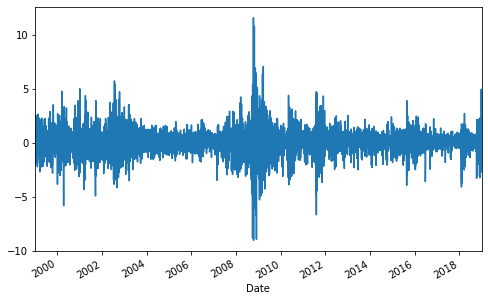

In [79]:
# S&P 500 index
st = dt.datetime(1998, 1, 1)
en = dt.datetime(2018, 12, 31)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot(figsize=(8,5))
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [80]:
from arch import arch_model

model = arch_model(returns, p=1, q=0)

split_date = dt.datetime(2018,1,1)
result = am.fit(last_obs=split_date)
print(result.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 28757.419061873006
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12358.6049950067
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7634.572085925583
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7681.5695215273645
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7441.3133969521205
Iteration:      6,   Func. Count:     35,   Neg. LLF: 7441.247025940547
Iteration:      7,   Func. Count:     39,   Neg. LLF: 7441.241917803041
Iteration:      8,   Func. Count:     43,   Neg. LLF: 7441.241714999768
Iteration:      9,   Func. Count:     46,   Neg. LLF: 7441.24171499966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7441.241714999768
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:               

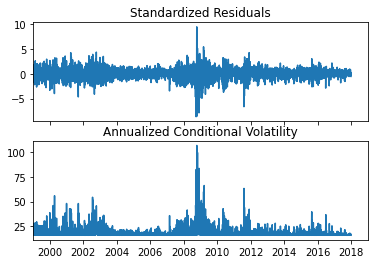

In [81]:
# Check the residuals
fig = result.plot(annualize="D")

In [84]:
#Get the forecasted variance
forecasts = result.forecast(horizon=1, start=split_date, reindex=False)

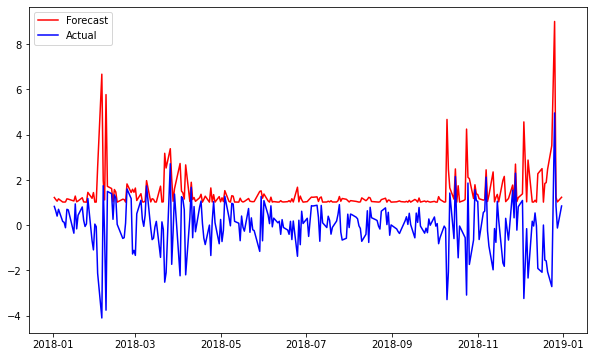

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(forecasts.variance[split_date:], color='r', label='Forecast')
ax.plot(returns[split_date:], color='b', label='Actual')
ax.legend()

***